In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Distribution
The normal distribution always describes a symmentric, unimodal, bell-shaped curve.

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

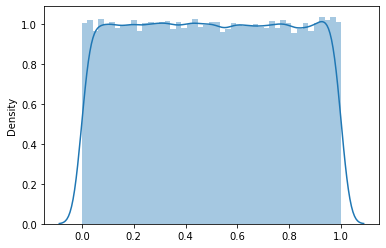

In [6]:
# monotonic distribution
mono = np.random.random(size=100000)
sns.distplot(mono)

## Theory
* N($\mu$, $\sigma$)
* Try
    * μ=2, σ=1
    * μ=-2, σ=1
    * μ=0, σ=2
    * μ=0, σ=0.5
    * n=10
    * n=10000

The normal distribution with mi=0 and sigma=1 is called the standard normal distribution.

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 1.0)

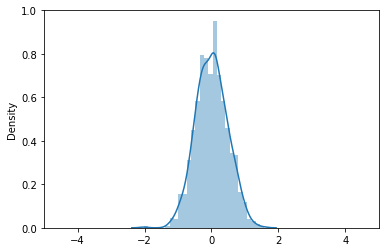

In [19]:
# normal distribution
mi = 0
sigma = 0.5
size = 1000

dist = np.random.normal(loc=mi, scale=sigma, size=size)
sns.distplot(dist)

plt.xlim([-5, 5])
plt.ylim([0, 1])

**How to interpret y-axis?**

> The only requirement of the density plot is that the total area under the curve integrates to one
> https://towardsdatascience.com/histograms-and-density-plots-in-python-f6bda88f5ac0

### Outliers

> - Several methods to find them:
     - Interquartile range ($\approx$2.7$\sigma$)
     - greater than 3$\sigma$ 
     - Cap on specified quantile

#### 1-sigma

In [20]:
len(list(filter(lambda x: (x>=mi-(1*sigma))&(x<=mi+(1*sigma)), dist)))/len(dist)

0.708

#### 2-sigma

In [21]:
len(list(filter(lambda x: (x>=mi-(2*sigma))&(x<=mi+(2*sigma)), dist)))/len(dist)

0.969

#### 3-sigma

In [22]:
len(list(filter(lambda x: (x>=mi-(3*sigma))&(x<=mi+(3*sigma)), dist)))/len(dist)

0.998

#### Outliers

In [23]:
len(list(filter(lambda x: ~((x>=mi-(3*sigma))&(x<=mi+(3*sigma))), dist)))/len(dist)

0.002

#### IQR (interquartile range)

In [24]:
q3, q1 = np.percentile(dist, [75 ,25])

iqr = q3 - q1
li = q1-iqr*1.5
ls = q3+iqr*1.5

len(list(filter(lambda x: (x>=li)&(x<=ls), dist)))/len(dist)

0.995

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'box-plot')

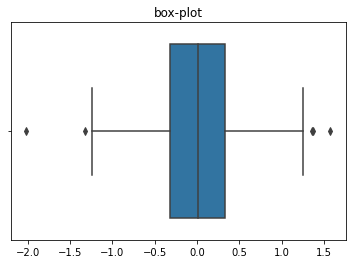

In [25]:
sns.boxplot(dist)
plt.title('box-plot')

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


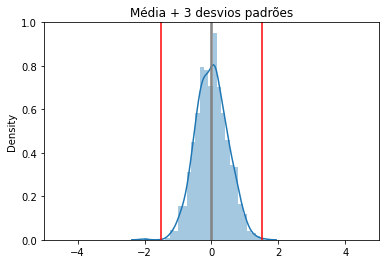

In [26]:
sns.distplot(dist)

plt.xlim([-5, 5])
plt.ylim([0, 1])

plt.title('Média + 3 desvios padrões')
plt.axvline(mi, color='gray')
plt.axvline(np.percentile(dist, 50), color='gray')
plt.axvline(mi + 3 * sigma, color='red')
plt.axvline(mi - 3 * sigma, color='red')

### Skewness

In [29]:
pd.DataFrame(dist).skew()

0    0.023263
dtype: float64

In [30]:
pd.DataFrame(mono).skew()

0    0.002692
dtype: float64

### Kurtosis

In [31]:
from scipy.stats import kurtosis

In [32]:
kurtosis(dist)

0.04918019610755131

In [33]:
kurtosis(mono)

-1.2013361532532048

## Some Analysis with Real Data

In [40]:
data = pd.read_csv('data/vehicles_messy.csv', low_memory=False)
data.head(3)

,barrels08,barrelsA08,charge120,charge240,city08,city08U,cityA08,cityA08U,cityCD,cityE,...,mfrCode,c240Dscr,charge240b,c240bDscr,createdOn,modifiedOn,startStop,phevCity,phevHwy,phevComb
0,15.695714,0.0,0.0,0.0,19,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
1,29.964545,0.0,0.0,0.0,9,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0
2,12.207778,0.0,0.0,0.0,23,0.0,0,0.0,0.0,0.0,...,NaN,NaN,0.0,NaN,Tue Jan 01 00:00:00 EST 2013,Tue Jan 01 00:00:00 EST 2013,NaN,0,0,0


What kind of insights could we get from those metrics? 
* mean and median
* right/left tail

In [41]:
data[['barrels08', 'pv4', 'UHighway']].describe()

,barrels08,pv4,UHighway
count,37843.000000,37843.000000,37843.000000
mean,17.532506,33.769125,33.619221
std,4.575950,45.914462,10.048326
min,0.060000,0.000000,0.000000
25%,14.330870,0.000000,27.100000
50%,17.347895,0.000000,33.000000
75%,20.600625,91.000000,38.109600
max,47.087143,192.000000,159.100000


----
**Let's plot too, to gain more information.**

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='barrels08', ylabel='Density'>

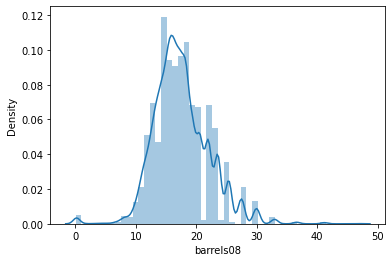

In [42]:
sns.distplot(data.barrels08)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='barrels08'>

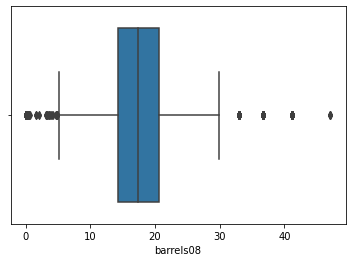

In [43]:
sns.boxplot(data.barrels08)

In [44]:
dist = data.barrels08
mi = data.barrels08.mean()
sigma = data.barrels08.std()

print('1-sigma: ', len(list(filter(lambda x: (x>=mi-(1*sigma))&(x<=mi+(1*sigma)), dist)))/len(dist))

print('3-sigma: ', len(list(filter(lambda x: (x>=mi-(2*sigma))&(x<=mi+(2*sigma)), dist)))/len(dist))

print('3-sigma: ', len(list(filter(lambda x: (x>=mi-(3*sigma))&(x<=mi+(3*sigma)), dist)))/len(dist))

1-sigma:  0.7446027006315566
3-sigma:  0.950743862801575
3-sigma:  0.9890336389821103


In [45]:
dist.skew()

0.5228910884255681

In [46]:
dist.kurtosis()

1.9945583785351473

----

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='pv4', ylabel='Density'>

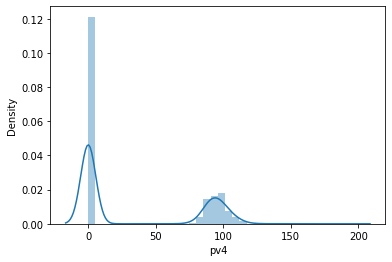

In [47]:
sns.distplot(data.pv4)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pv4'>

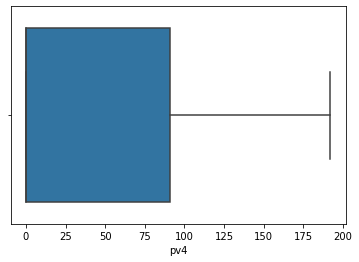

In [48]:
sns.boxplot(data.pv4)

In [49]:
dist = data.pv4
mi = data.pv4.mean()
sigma = data.pv4.std()

print('1-sigma: ', len(list(filter(lambda x: (x>=mi-(1*sigma))&(x<=mi+(1*sigma)), dist)))/len(dist))

print('2-sigma: ', len(list(filter(lambda x: (x>=mi-(2*sigma))&(x<=mi+(2*sigma)), dist)))/len(dist))

print('3-sigma: ', len(list(filter(lambda x: (x>=mi-(3*sigma))&(x<=mi+(3*sigma)), dist)))/len(dist))

1-sigma:  0.6506090954734033
2-sigma:  0.9984409269878181
3-sigma:  0.9998943001347673


In [50]:
dist.skew()

0.6514171731670279

In [51]:
dist.kurtosis()

-1.511411848618096

----

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UHighway', ylabel='Density'>

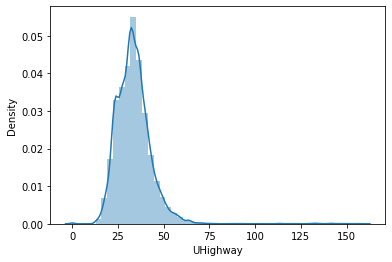

In [52]:
sns.distplot(data.UHighway)

C:\Users\natmc\AppData\Roaming\Python\Python39\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='UHighway'>

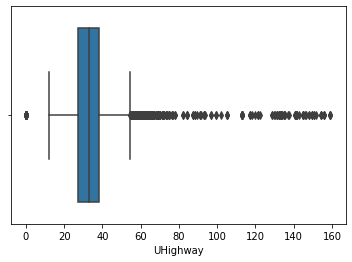

In [53]:
sns.boxplot(data.UHighway)

In [54]:
dist = data.UHighway
mi = data.UHighway.mean()
sigma = data.UHighway.std()

print('1-sigma: ', len(list(filter(lambda x: (x>=mi-(1*sigma))&(x<=mi+(1*sigma)), dist)))/len(dist))

print('2-sigma: ', len(list(filter(lambda x: (x>=mi-(2*sigma))&(x<=mi+(2*sigma)), dist)))/len(dist))

print('3-sigma: ', len(list(filter(lambda x: (x>=mi-(3*sigma))&(x<=mi+(3*sigma)), dist)))/len(dist))

1-sigma:  0.7675395713870464
2-sigma:  0.9727030098036625
3-sigma:  0.9925481595010966


In [55]:
dist.skew()

3.0440866035602463

In [56]:
dist.kurtosis()

27.375435125372807

In [57]:
q3, q1 = np.percentile(data.UHighway, [75 ,25])

iqr = q3 - q1
li = q1-iqr*1.5
ls = q3+iqr*1.5

len(list(filter(lambda x: (x>=li)&(x<=ls), dist)))/len(dist)

0.976402505086806

-----